In [1]:
from amftrack.pipeline.development.high_mag_videos.kymo_class import *
from amftrack.pipeline.development.high_mag_videos.plot_data import (
    save_raw_data,
    plot_summary
)
# from amftrack.pipeline.development.high_mag_videos.high_mag_videos_fun import segment_brightfield
import os
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import cv2
from tifffile import imwrite
from tifffile import imread
from tqdm import tqdm
%matplotlib widget
%load_ext autoreload
%autoreload 2
from amftrack.pipeline.functions.image_processing.extract_graph import (
    from_sparse_to_graph,
    generate_nx_graph,
    clean_degree_4,
)
import scipy
from pathlib import Path
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300


/gpfs/home6/svstaalduine/AMF_project/amftrack/util/dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
2023-08-11 16:39:15.646244: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-11 16:39:15.862753: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /gpfs/home6/svstaalduine/.local/lib/python3.9/site-packages/cv2/../../lib64:/sw/arch/Centos8/EB_production/2021/software/ZeroMQ/4.3.4-GCCcore-10.3.0/lib:

In [12]:
def segment_brightfield(image, thresh=0.5e-6, frangi_range=np.arange(70, 170, 30), seg_thresh = 11, binning=2):
    frangi_range = frangi_range * 2 / binning
    smooth_im_blur = cv2.blur(-image, (11, 11))
    smooth_im = frangi(-smooth_im_blur, frangi_range)
    smooth_im = np.array(smooth_im * (255/np.max(smooth_im)), dtype=np.uint8)
    seg_shape = smooth_im.shape

#     for i in range(1, 100):
#         _, segmented = cv2.threshold(smooth_im, i, 255, cv2.THRESH_BINARY)
#         coverage = 100 * np.sum(1 * segmented.flatten()) / (255 * seg_shape[0] * seg_shape[1])
#         if coverage < seg_thresh:
#             break
    return smooth_im
    

vid_folder = Path("/gpfs/home6/svstaalduine/Analysis/CocoTransport/")
plate = "20230729_Plate440"
vid_interest = "090"
edge_interest = "edge (4, 1)"
img_address = vid_folder / plate / vid_interest / edge_interest
# img_address = vid_folder

imgs = sorted([path for path in img_address.glob("*kymos*.ti*")])
img = imread(imgs[0])[0]

print(imgs)

[PosixPath('/gpfs/home6/svstaalduine/Analysis/CocoTransport/20230729_Plate440/090/edge (4, 1)/(4, 1)_kymos_array.tiff')]


In [ ]:
# segmented = segment_brightfield(img, frangi_range = np.arange(5, 40, 3))
segmented = segment_brightfield(img, frangi_range = np.arange(10, 150, 20))
_, segment_thresh = cv2.threshold(segmented, 0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
segment_thresh = cv2.morphologyEx(segment_thresh, cv2.MORPH_CLOSE, np.ones((250,250)))

fig, ax = plt.subplots(2, 2, figsize=(10, 5))
ax[0][0].imshow(img)
ax[0][1].imshow(segmented)
ax[1][0].imshow(segment_thresh)
fig.tight_layout()

# fig, ax = plt.subplots()
# ax.hist(segmented.flatten())

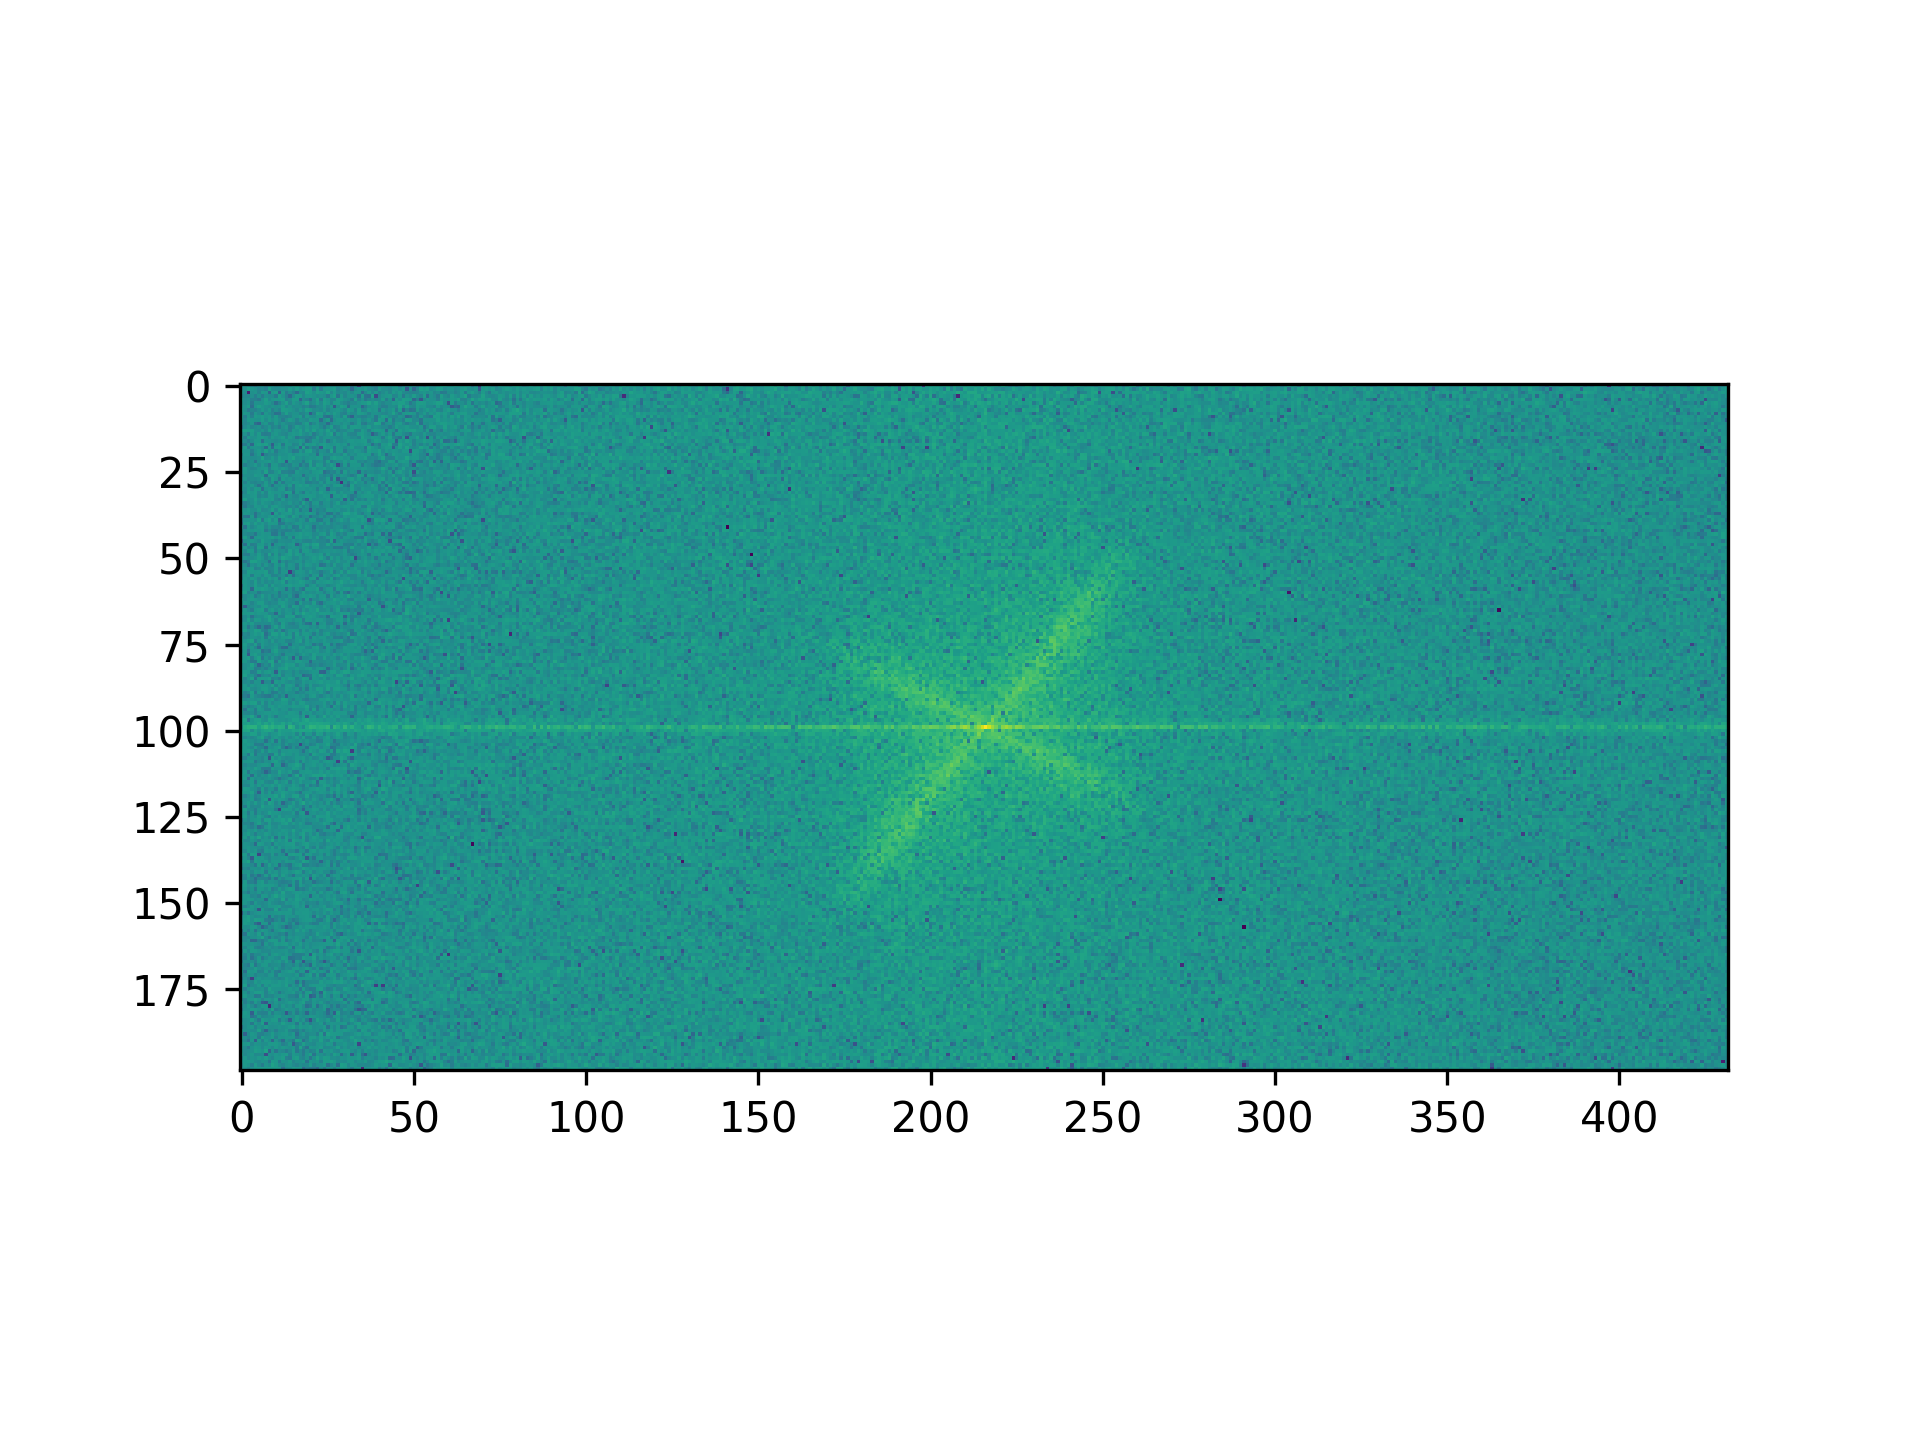

In [13]:
ftimage = np.fft.fft2(img)
ftimage = np.fft.fftshift(ftimage)

fig, ax = plt.subplots()
ax.imshow(np.log(abs(ftimage.real)))